# Explore here

In [1]:
import os 

archivo_csv = 'data/raw/dataraw.csv'
#ruta relativa del archivo CSV
ruta_completa = os.path.abspath(archivo_csv)

print("Ruta completa del archivo CSV:", ruta_completa)

Ruta completa del archivo CSV: /workspaces/eda-repository-/src/data/raw/dataraw.csv


In [2]:
import pandas as pd
data_table = pd.read_csv('/workspaces/eda-repository-/data/raw/dataraw.csv')
#ruta absoluta (sirve para hacerme la chula)
data_table.info()
#data_table.shape
#data_table.head()
# host_name, name, last_review, neighbourhood, host_id fuera (latitud, longitud también), me dirás tu como las relaciono con alguna otra variable 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
dt_nio = data_table.drop(['id', 'host_name', 'name', 'last_review', 'neighbourhood', 'host_id'], axis = 1)
dt_nio.info()

#puedo hacer scatterplot de: room_type btwn price, price btwn neighbourhood_group, price btwn minimun_nights, last_review btwn price


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


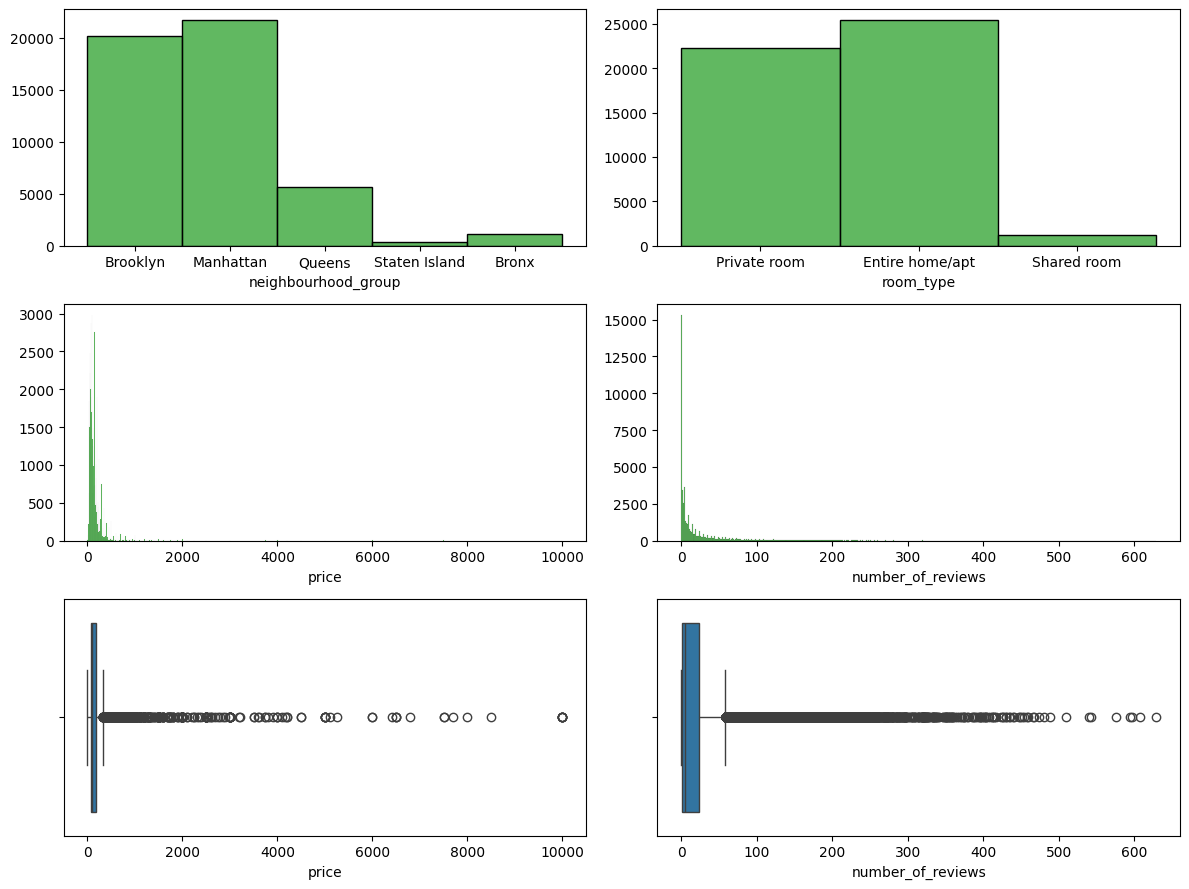

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize = (12, 9))
#sns.set(style="white")
sns.histplot(ax = axis[0, 0], data= dt_nio, x = 'neighbourhood_group', color = 'C2').set(ylabel = None)
sns.histplot(ax = axis[0, 1], data= dt_nio, x = 'room_type', color = 'C2').set(ylabel = None)
sns.histplot(ax = axis[1, 0], data= dt_nio, x = 'price', color = 'C2').set(ylabel = None)
sns.boxplot(ax = axis[2, 0], data = dt_nio, x = 'price')
sns.histplot(ax = axis[1, 1], data= dt_nio, x = 'number_of_reviews', color = 'C2').set(ylabel = None)
sns.boxplot(ax = axis[2, 1], data = dt_nio, x = 'number_of_reviews')

plt.tight_layout()
plt.show()

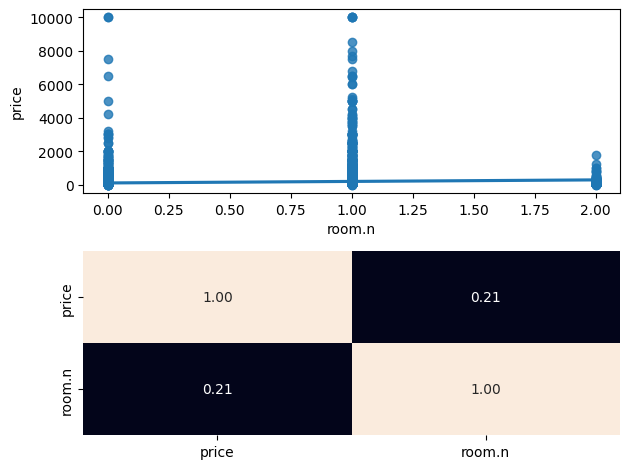

In [5]:
dt_nio['room.n'] = pd.factorize(dt_nio["room_type"])[0]

fig, axis = plt.subplots(2, 1)

sns.regplot(data = dt_nio, x = "room.n", y = "price", ax = axis[0])
sns.heatmap(dt_nio[["price", "room.n"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()
plt.show()
# neighbourhood_group, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

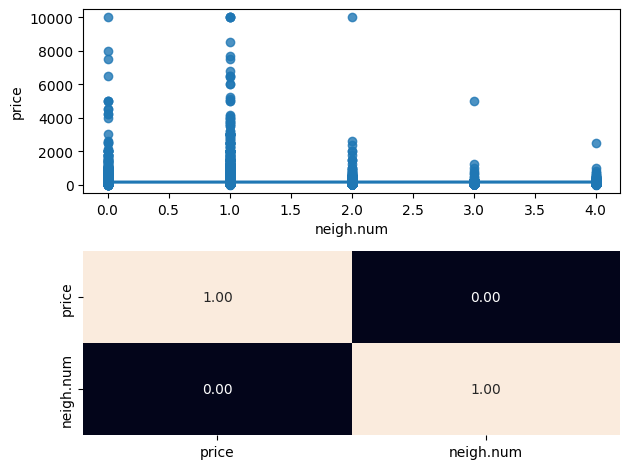

In [6]:
dt_nio['neigh.num'] = pd.factorize(dt_nio['neighbourhood_group'])[0]

fig, axis = plt.subplots(2, 1)

sns.regplot(data = dt_nio, x = "neigh.num", y = 'price', ax = axis[0])
sns.heatmap(dt_nio[["price", "neigh.num"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar=False)

plt.tight_layout()
plt.show()

<Axes: >

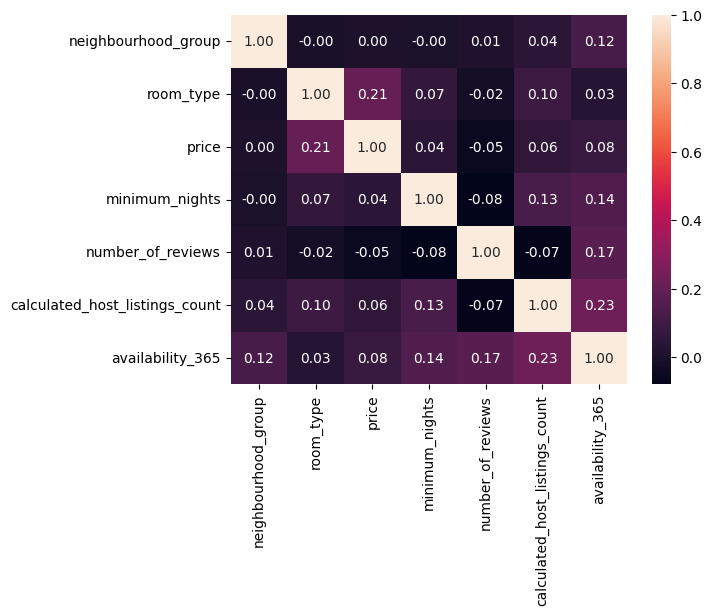

In [71]:
t_cols = ['neighbourhood_group', 'room_type']

# Iterar sobre las columnas y aplicar pd.factorize
for col in t_cols:
    dt_nio[col] = pd.factorize(dt_nio[col])[0]

sns.heatmap(dt_nio[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr(), annot= True, fmt= '.2f')

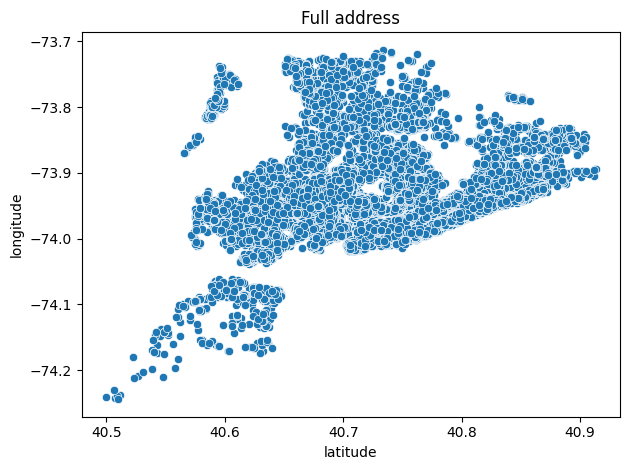

In [9]:
sns.scatterplot(x = dt_nio['latitude'], y = dt_nio['longitude'])
plt.title('Full address')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.tight_layout()
plt.show()

In [10]:
dt_nio.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room.n,neigh.num
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


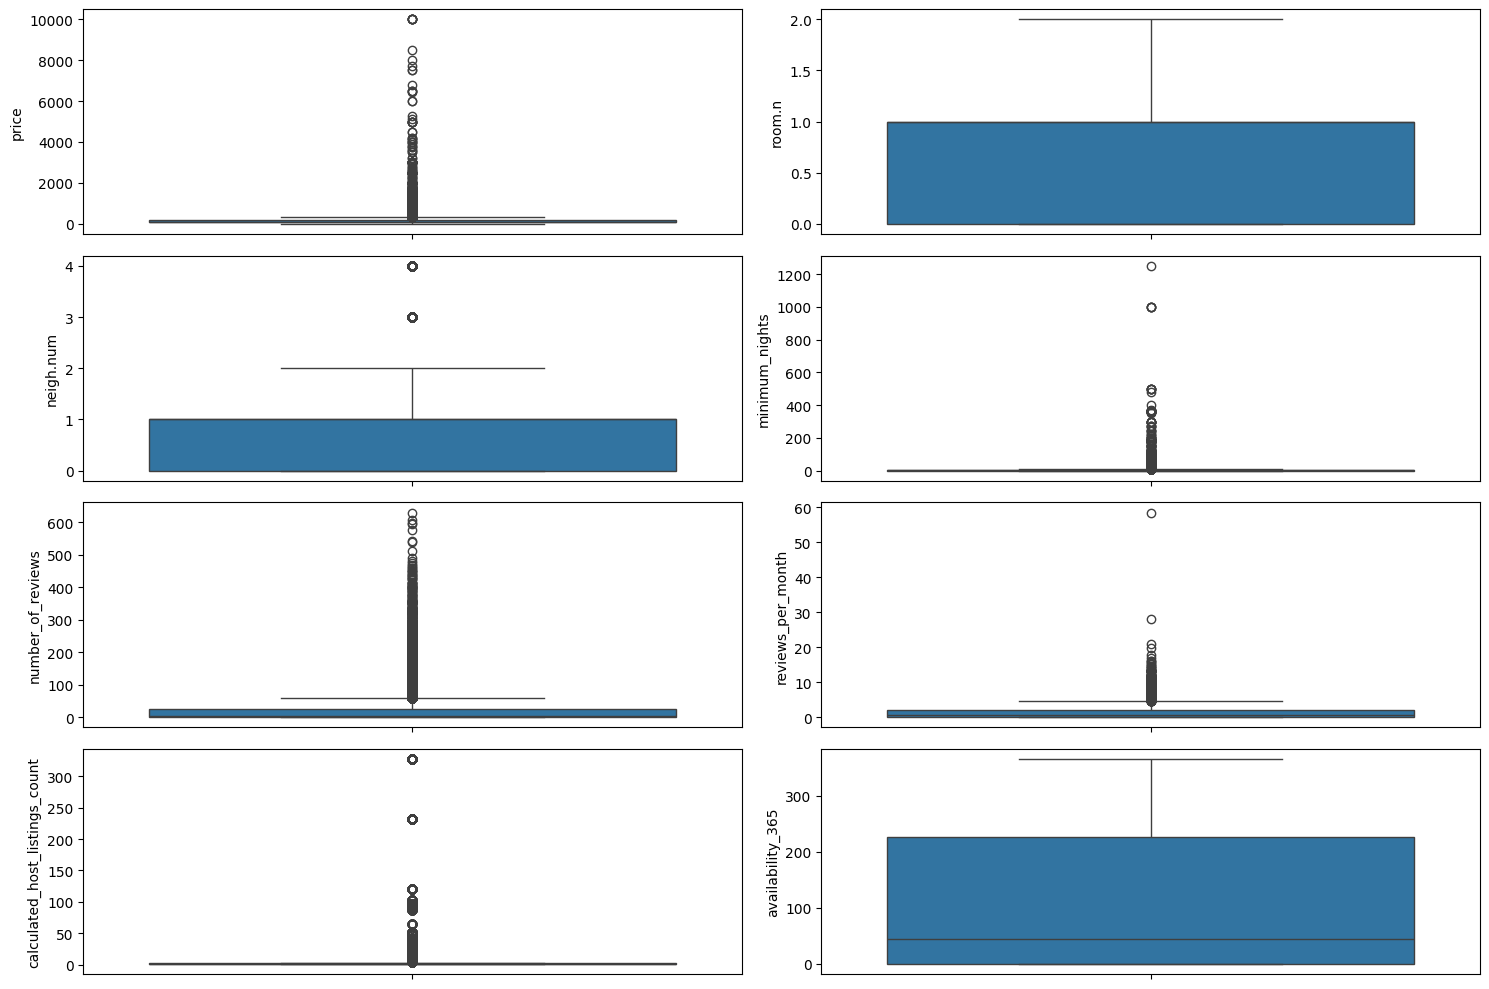

In [20]:
fig, axis= plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dt_nio, y= 'price')
sns.boxplot(ax = axis[0, 1], data = dt_nio, y= 'room.n')
sns.boxplot(ax = axis[1, 0], data = dt_nio, y= 'neigh.num')
sns.boxplot(ax= axis [1, 1], data= dt_nio, y= 'minimum_nights')
sns.boxplot(ax= axis[2, 0], data= dt_nio, y= 'number_of_reviews')
sns.boxplot(ax= axis[2, 1], data= dt_nio, y= 'reviews_per_month')
sns.boxplot(ax= axis[3, 0], data= dt_nio, y= 'calculated_host_listings_count')
sns.boxplot(ax= axis[3, 1], data= dt_nio, y= 'availability_365')
plt.tight_layout()

plt.show()
#se demuestra que especular con las propiedades lleva a la destruccion de la riqueza del estado


In [21]:
price_sts = dt_nio["price"].describe()
price_sts

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [23]:
price_itval = price_sts['75%'] - price_sts['25%']
upper_limit = price_sts['75%'] + 1.5 * price_itval
lower_limit = price_sts['25%'] - 1.5 * price_itval
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_itval, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0
